In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

env = gym.make('FrozenLake-v0')  # 이미 만들어져 있음 : 'is_slippery': True

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])

[2017-02-07 19:43:26,003] Making new env: FrozenLake-v0


In [2]:
# Discount factor
dis = .99

In [3]:
# Set learning parameters
learning_rate = .85
num_episodes = 2000

# create list to contain total rewars and steps per episode
rList = []

In [4]:
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
    
        # Get new state and reward from environment
        new_state, reward, done,_ = env.step(action)
    
        # Update Q-Table with new knowledge using learning rate
        Q[state,action] = (1-learning_rate) * Q[state,action] \
            + learning_rate*(reward + dis * np.max(Q[new_state,:]))
    
        rAll += reward
        state = new_state
    
    rList.append(rAll)

Success rate: 0.6365
Finale Q-Table Values
LEFT DOWN RIGHT UP
[[  4.70050526e-01   5.62407892e-03   3.56121082e-03   3.85505560e-03]
 [  4.62215585e-03   8.50471676e-05   6.56947599e-04   4.36440014e-01]
 [  8.89782041e-04   4.41709827e-03   8.71467444e-03   5.12422170e-01]
 [  1.50597930e-03   4.77585320e-04   6.06566983e-04   4.45861731e-01]
 [  7.77997058e-01   4.50070088e-04   6.31423090e-04   5.40878699e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.82755229e-02   1.66323694e-07   2.59849412e-04   1.49361382e-07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.95358681e-03   7.18274953e-06   6.52603317e-04   3.20080977e-01]
 [  0.00000000e+00   7.32744637e-01   2.22011071e-03   0.00000000e+00]
 [  8.35789877e-01   6.14169675e-04   0.00000000e+00   3.14871732e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.15608764e

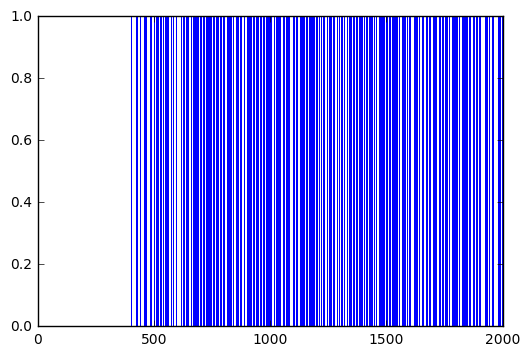

In [5]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Finale Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
#plt.bar(range(len(rList)), rList, color="blue")   # blue가 안먹네. (윈7) : edgecolor가 검은색
#plt.bar(range(len(rList)), rList, color="blue", edgecolor="none")    # edgecolor를 none으로 하면 color가 나옴
plt.bar(range(len(rList)), rList, color="blue", linewidth=0)    # edgecolor를 none으로 하면 color가 나옴
plt.show()